# University of Kentucky Daily Crime Log

The University of Kentucky provides publically available information on crimes commited on campus property.
The following process is the extraction, analysis, and visualization of the data.

## Scraping the Data

In [1]:
# Import the support libraries
from os import getenv
import requests
from bs4 import BeautifulSoup
import pandas as pd
from dateutil.parser import parser
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# we are going to scrape crime data from the UK crime http://www.uky.edu/crimelog/
# substitute variables to fill in REST query criteria
start_month, start_day, start_year = 1, 1, 2019
end_month, end_day, end_year = 12, 31, 2019
crime_data_raw = requests.get('http://www.uky.edu/crimelog/log?field_log_category_value=All' +
                              '&field_log_report_value%5Bmin%5D%5Bmonth%5D=' + str(start_month) +
                              '&field_log_report_value%5Bmin%5D%5Bday%5D=' + str(start_day) +
                              '&field_log_report_value%5Bmin%5D%5Byear%5D=' + str(start_year) +
                              '&field_log_report_value%5Bmax%5D%5Bmonth%5D=' + str(end_month) +
                              '&field_log_report_value%5Bmax%5D%5Bday%5D=' + str(end_day) +
                              '&field_log_report_value%5Bmax%5D%5Byear%5D=' + str(end_year)
                             )

In [3]:
# create a soup object 
crime_bs_proc = BeautifulSoup((crime_data_raw.text), "html.parser")

## Processing the Data

In [4]:
# find the table header in the data
crime_data_header = crime_bs_proc.find('thead')

In [5]:
# find all the table headers
crime_data_heads = crime_data_header.find_all('th')

In [6]:
# create an empty list for the header
header = []

# iterate through the header element to get text
for col in crime_data_heads:
    cols = col.find_all('a')
    cols = [ele.text.strip() for ele in cols]
    header.append([ele for ele in cols if ele])

# flatten the list to a single list
header = [item for sublist in header for item in sublist]


In [7]:
# find the table rows in the data
crime_data_body = crime_bs_proc.find('tbody')

In [8]:
# find all table rows
crime_data_rows = crime_data_body.find_all('tr')

In [9]:
# create an empty list for the rows of data
data = []

# iterate through the header element to get the rows
for row in crime_data_rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele])


In [10]:
# create a dataframe with our data using our header list
uk_crime_data = pd.DataFrame(data, columns=header)
uk_crime_data.head()

,Category,Case number,Crime date and time,Report date,Location,Incident Description,Residential occurrence,Disposition
0,Alcohol Intoxication,201911220011,11/22/2019 - 1:40am,11/22/2019,409 SOUTH LIMESTONE STREET - PARKING STRUCTURE...,ALCOHOL INTOXICATION,No,Closed
1,Alcohol Intoxication,CSA20191328,11/21/2019 - 10:30pm,11/22/2019,361 HUGUELET DRIVE - DONOVAN HALL,PERSON 18-20 POSSESSION/PURCHASE/ATTEMPT TO PU...,No,Closed - CSA
2,Assault,CSA20191323,11/22/2019 - 5:10am,11/22/2019,1350 BULL LEA ROAD - EASTERN STATE HOSPITAL,ASSAULT,No,Closed - CSA
3,Assault,201911210019-01,11/21/2019 - 3:52am,11/21/2019,310 SOUTH LIMESTONE STREET - GOOD SAMARITAN HO...,"ASSAULT, 4TH DEGREE NO VISIBLE INJURY",No,Citation issued
4,Sex Offenses,CSA20191315,11/15/2019 - 12:00am,11/21/2019,ON CAMPUS - RESIDENCE HALL,RAPE,Yes,Closed - CSA


In [11]:
# backup the raw scraped data to CSV file
uk_crime_data.to_csv('data/ukpd_crimelog_2019.csv', index=False)

## Structuring the Data

In [12]:
# create a new dataframe from the CSV
uk_crime_csv = pd.read_csv('data/ukpd_crimelog_2019.csv')
uk_crime_csv.head()

,Category,Case number,Crime date and time,Report date,Location,Incident Description,Residential occurrence,Disposition
0,Alcohol Intoxication,201911220011,11/22/2019 - 1:40am,11/22/2019,409 SOUTH LIMESTONE STREET - PARKING STRUCTURE...,ALCOHOL INTOXICATION,No,Closed
1,Alcohol Intoxication,CSA20191328,11/21/2019 - 10:30pm,11/22/2019,361 HUGUELET DRIVE - DONOVAN HALL,PERSON 18-20 POSSESSION/PURCHASE/ATTEMPT TO PU...,No,Closed - CSA
2,Assault,CSA20191323,11/22/2019 - 5:10am,11/22/2019,1350 BULL LEA ROAD - EASTERN STATE HOSPITAL,ASSAULT,No,Closed - CSA
3,Assault,201911210019-01,11/21/2019 - 3:52am,11/21/2019,310 SOUTH LIMESTONE STREET - GOOD SAMARITAN HO...,"ASSAULT, 4TH DEGREE NO VISIBLE INJURY",No,Citation issued
4,Sex Offenses,CSA20191315,11/15/2019 - 12:00am,11/21/2019,ON CAMPUS - RESIDENCE HALL,RAPE,Yes,Closed - CSA


In [13]:
# descriptive statistical summary
uk_crime_csv.describe()

,Category,Case number,Crime date and time,Report date,Location,Incident Description,Residential occurrence,Disposition
count,537,537,537,537,537,537,537,537
unique,19,537,508,59,156,189,2,8
top,Theft,201911200034-01,10/07/2019 - 12:00am,11/15/2019,1350 BULL LEA ROAD - EASTERN STATE HOSPITAL,HARASSMENT-PHYSICAL CONTACT-NO INJURY,No,Closed - CSA
freq,106,1,2,21,129,43,393,260


In [14]:
uk_crime_csv['Street'] = [i[0] for i in (uk_crime_csv.Location.apply(lambda x: x.split(' - ')))]
uk_crime_csv['Area'] = [i[-1] for i in (uk_crime_csv.Location.apply(lambda x: x.split(' - ')))]

In [15]:
del uk_crime_csv['Location']

In [16]:
uk_crime_csv.head()

,Category,Case number,Crime date and time,Report date,Incident Description,Residential occurrence,Disposition,Street,Area
0,Alcohol Intoxication,201911220011,11/22/2019 - 1:40am,11/22/2019,ALCOHOL INTOXICATION,No,Closed,409 SOUTH LIMESTONE STREET,"PARKING STRUCTURE #5, SIDEWALK ACROSS STREET"
1,Alcohol Intoxication,CSA20191328,11/21/2019 - 10:30pm,11/22/2019,PERSON 18-20 POSSESSION/PURCHASE/ATTEMPT TO PU...,No,Closed - CSA,361 HUGUELET DRIVE,DONOVAN HALL
2,Assault,CSA20191323,11/22/2019 - 5:10am,11/22/2019,ASSAULT,No,Closed - CSA,1350 BULL LEA ROAD,EASTERN STATE HOSPITAL
3,Assault,201911210019-01,11/21/2019 - 3:52am,11/21/2019,"ASSAULT, 4TH DEGREE NO VISIBLE INJURY",No,Citation issued,310 SOUTH LIMESTONE STREET,GOOD SAMARITAN HOSPITAL
4,Sex Offenses,CSA20191315,11/15/2019 - 12:00am,11/21/2019,RAPE,Yes,Closed - CSA,ON CAMPUS,RESIDENCE HALL


In [17]:
uk_crime_csv['Street'] = uk_crime_csv.Street.apply(lambda x: x + ', LEXINGTON, KY')

In [18]:
uk_crime_csv.head()

,Category,Case number,Crime date and time,Report date,Incident Description,Residential occurrence,Disposition,Street,Area
0,Alcohol Intoxication,201911220011,11/22/2019 - 1:40am,11/22/2019,ALCOHOL INTOXICATION,No,Closed,"409 SOUTH LIMESTONE STREET, LEXINGTON, KY","PARKING STRUCTURE #5, SIDEWALK ACROSS STREET"
1,Alcohol Intoxication,CSA20191328,11/21/2019 - 10:30pm,11/22/2019,PERSON 18-20 POSSESSION/PURCHASE/ATTEMPT TO PU...,No,Closed - CSA,"361 HUGUELET DRIVE, LEXINGTON, KY",DONOVAN HALL
2,Assault,CSA20191323,11/22/2019 - 5:10am,11/22/2019,ASSAULT,No,Closed - CSA,"1350 BULL LEA ROAD, LEXINGTON, KY",EASTERN STATE HOSPITAL
3,Assault,201911210019-01,11/21/2019 - 3:52am,11/21/2019,"ASSAULT, 4TH DEGREE NO VISIBLE INJURY",No,Citation issued,"310 SOUTH LIMESTONE STREET, LEXINGTON, KY",GOOD SAMARITAN HOSPITAL
4,Sex Offenses,CSA20191315,11/15/2019 - 12:00am,11/21/2019,RAPE,Yes,Closed - CSA,"ON CAMPUS, LEXINGTON, KY",RESIDENCE HALL


In [19]:
# backup the raw scraped data to CSV file
uk_crime_csv.to_csv('data/ukpd_crimelog_2019_geo.csv', index=False)

## Geocoding the Data

In [20]:
uk_crime_geo = pd.read_csv('data/ukpd_crimelog_2019_geo.csv')
uk_crime_geo.head()

,Category,Case number,Crime date and time,Report date,Incident Description,Residential occurrence,Disposition,Street,Area
0,Alcohol Intoxication,201911220011,11/22/2019 - 1:40am,11/22/2019,ALCOHOL INTOXICATION,No,Closed,"409 SOUTH LIMESTONE STREET, LEXINGTON, KY","PARKING STRUCTURE #5, SIDEWALK ACROSS STREET"
1,Alcohol Intoxication,CSA20191328,11/21/2019 - 10:30pm,11/22/2019,PERSON 18-20 POSSESSION/PURCHASE/ATTEMPT TO PU...,No,Closed - CSA,"361 HUGUELET DRIVE, LEXINGTON, KY",DONOVAN HALL
2,Assault,CSA20191323,11/22/2019 - 5:10am,11/22/2019,ASSAULT,No,Closed - CSA,"1350 BULL LEA ROAD, LEXINGTON, KY",EASTERN STATE HOSPITAL
3,Assault,201911210019-01,11/21/2019 - 3:52am,11/21/2019,"ASSAULT, 4TH DEGREE NO VISIBLE INJURY",No,Citation issued,"310 SOUTH LIMESTONE STREET, LEXINGTON, KY",GOOD SAMARITAN HOSPITAL
4,Sex Offenses,CSA20191315,11/15/2019 - 12:00am,11/21/2019,RAPE,Yes,Closed - CSA,"ON CAMPUS, LEXINGTON, KY",RESIDENCE HALL


In [21]:
unique_locations = list(uk_crime_geo.Street.unique())

In [22]:
unique_locations

['409 SOUTH LIMESTONE STREET, LEXINGTON, KY',
 '361 HUGUELET DRIVE, LEXINGTON, KY',
 '1350 BULL LEA ROAD, LEXINGTON, KY',
 '310 SOUTH LIMESTONE STREET, LEXINGTON, KY',
 'ON CAMPUS, LEXINGTON, KY',
 'WOODLAND AVENUE IN FRONT OF CHELLGREN HALL, LEXINGTON, KY',
 '701 SPORTS CENTER DRIVE, LEXINGTON, KY',
 '1000 SOUTH LIMESTONE STREET, LEXINGTON, KY',
 '720 WOODLAND AVENUE, LEXINGTON, KY',
 'VARIOUS LOCATIONS ON CAMPUS, LEXINGTON, KY',
 '329 SOUTH MARTIN LUTHER KING BOULEVARD, LEXINGTON, KY',
 '326 SOUTH MARTIN LUTHER KING BOULEVARD, LEXINGTON, KY',
 '344 SOUTH MARTIN LUTHER KING BOULEVARD, LEXINGTON, KY',
 '111 AVENUE OF CHAMPIONS, LEXINGTON, KY',
 '510 WILDCAT COURT, LEXINGTON, KY',
 '680 ROSE STREET, LEXINGTON, KY',
 'SOUTH LIMESTON STREET/CONN TERRACE, LEXINGTON, KY',
 'LEXINGTON AVENUE/EAST MAXWELL STREET, LEXINGTON, KY',
 '703 SPORTS CENTER DRIVE, LEXINGTON, KY',
 '1120 UNIVERSITY DRIVE, LEXINGTON, KY',
 '411 SOUTH LIMESTONE STREET, LEXINGTON, KY',
 '111 AVENUE OF CHAMPIONS/LIMESTONE 

### Still to finish

In [23]:
#import the geocoder API (you'll need an api key)
from geopy.geocoders import OpenCage
geolocator = OpenCage(api_key='')

In [8]:
geolocator.geocode('1120 UNIVERSITY DRIVE, LEXINGTON, KY')

Location(Lewis Hall, 1120 University Drive, Lexington, KY 40526, United States of America, (38.0314545, -84.5030904, 0.0))

In [ ]:
street_locs = [geolocator.geocode(i) for i in uk_crime_geo.Street]
#locs = pd.DataFrame([(i, i.latitude, i.longitude) for i in street_locs], columns=['Location', 'Latitude', 'Longitude'])
#streets_geocoded = uk_crime_geo.combine_first(locs)

## Time Series Analysis

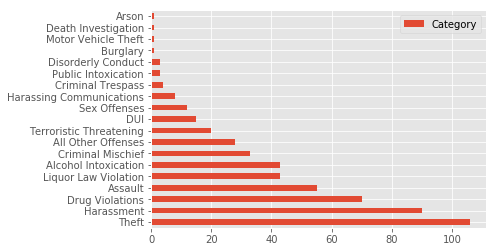

In [24]:
# plot the number of crime categories in 2019
category_summary = pd.DataFrame(uk_crime_csv.Category.value_counts())
category_summary.plot(kind='barh')

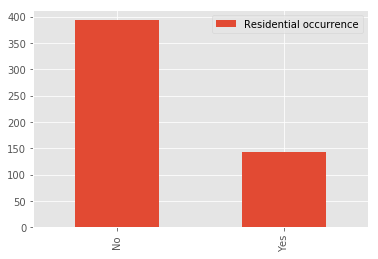

In [25]:
# plot the number of residential occurences in 2019
residential_summary = pd.DataFrame(uk_crime_csv['Residential occurrence'].value_counts())
residential_summary.plot(kind='bar')

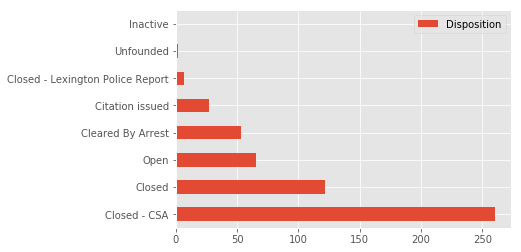

In [26]:
# plot the number of crime case outcomes in 2019
disposition_summary = pd.DataFrame(uk_crime_csv.Disposition.value_counts())
disposition_summary.plot(kind='barh')

In [27]:
# import data with datetime group as index
uk_crime_datetime = pd.read_csv('data/ukpd_crimelog_2019.csv', index_col='Crime date and time', parse_dates=True)

In [28]:
uk_crime_datetime.head()

,Category,Case number,Report date,Location,Incident Description,Residential occurrence,Disposition
Crime date and time,,,,,,,
2019-11-22 01:40:00,Alcohol Intoxication,201911220011,11/22/2019,409 SOUTH LIMESTONE STREET - PARKING STRUCTURE...,ALCOHOL INTOXICATION,No,Closed
2019-11-21 22:30:00,Alcohol Intoxication,CSA20191328,11/22/2019,361 HUGUELET DRIVE - DONOVAN HALL,PERSON 18-20 POSSESSION/PURCHASE/ATTEMPT TO PU...,No,Closed - CSA
2019-11-22 05:10:00,Assault,CSA20191323,11/22/2019,1350 BULL LEA ROAD - EASTERN STATE HOSPITAL,ASSAULT,No,Closed - CSA
2019-11-21 03:52:00,Assault,201911210019-01,11/21/2019,310 SOUTH LIMESTONE STREET - GOOD SAMARITAN HO...,"ASSAULT, 4TH DEGREE NO VISIBLE INJURY",No,Citation issued
2019-11-15 00:00:00,Sex Offenses,CSA20191315,11/21/2019,ON CAMPUS - RESIDENCE HALL,RAPE,Yes,Closed - CSA
